In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
weights_df = pd.read_csv('perceptron_weights.csv') 
test_obs_df = pd.read_csv('test_observations.csv') 
training_accuracy_df = pd.read_csv('training_accuracy.csv')  

w0 = weights_df['w0'].iloc[0]  # for sepal_length
w1 = weights_df['w1'].iloc[0]  # for sepal_width
w2 = weights_df['w2'].iloc[0]  # for petal_length
w3 = weights_df['w3'].iloc[0]  # for petal_width
threshold = weights_df['threshold'].iloc[0]
print("Perceptron Parameters:")
print(f"w0 (sepal_length) = {w0}, w1 (sepal_width) = {w1}, w2 (petal_length) = {w2}, w3 (petal_width) = {w3}, threshold = {threshold}")

Perceptron Parameters:
w0 (sepal_length) = 0.1500000000000002, w1 (sepal_width) = 0.5900000000000003, w2 (petal_length) = -0.7000000000000002, w3 (petal_width) = -0.4299999999999999, threshold = -0.1


In [10]:
# --- Sepal means
fixed_sepal_length = test_obs_df['sepal_length'].mean()
fixed_sepal_width  = test_obs_df['sepal_width'].mean()
print(f"Fixed sepal_length = {fixed_sepal_length:.2f}, Fixed sepal_width = {fixed_sepal_width:.2f}")

Fixed sepal_length = 5.42, Fixed sepal_width = 3.04


In [11]:
# --- Compute the constant term for the decision function ---
const_term = threshold - (w0 * fixed_sepal_length + w1 * fixed_sepal_width)
print(f"Constant term = {const_term:.2f}")

Constant term = -2.71


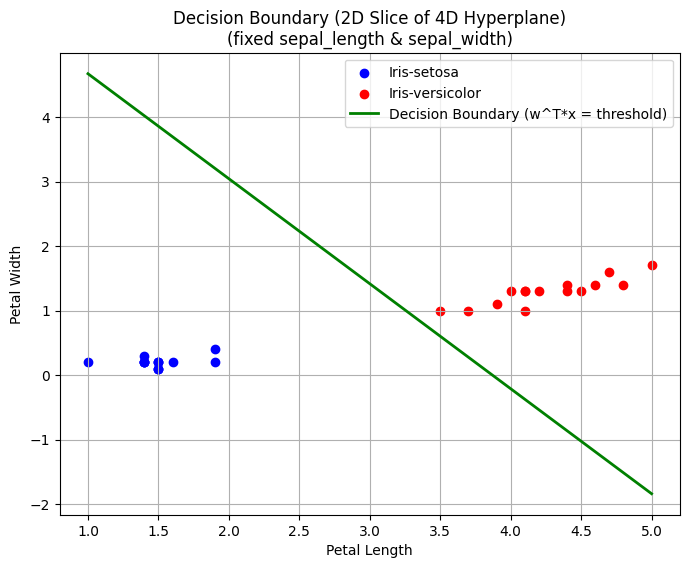

In [12]:
# --- Define a range for petal_length and compute petal_width values ---
x_min = test_obs_df['petal_length'].min()
x_max = test_obs_df['petal_length'].max()
x_vals = np.linspace(x_min, x_max, 100)
y_vals = (const_term - w2 * x_vals) / w3

# --- Separate test observations by label
setosa = test_obs_df[test_obs_df['label'] == 1]
versicolor = test_obs_df[test_obs_df['label'] == 0]

# y = (w^T -w2*X)/w3
# --- Plot test observations and decision boundary ---
plt.figure(figsize=(8, 6))
plt.scatter(setosa['petal_length'], setosa['petal_width'], color='blue', label='Iris-setosa')
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], color='red', label='Iris-versicolor')
plt.plot(x_vals, y_vals, color='green', linewidth=2, label='Decision Boundary (w^T*x = threshold)')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision Boundary (2D Slice of 4D Hyperplane)\n(fixed sepal_length & sepal_width)")
plt.legend()
plt.grid(True)
plt.show()

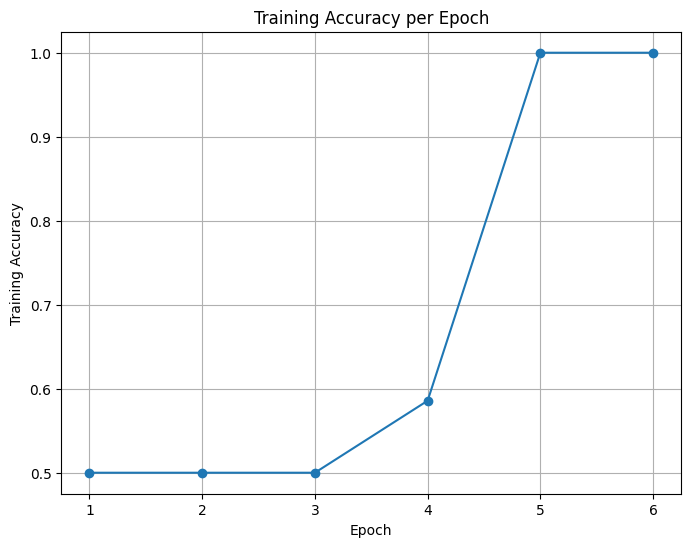

In [13]:
# --- Plot the Training Accuracy per Epoch ---
plt.figure(figsize=(8, 6))
plt.plot(training_accuracy_df['Epoch'], training_accuracy_df['Accuracy'], marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy per Epoch")
plt.grid(True)
plt.show()